<a href="https://colab.research.google.com/github/ranioktaviana/Analisis-Prediksi-Data-Pengangguran-Berdasarkan-Tingkat-Pendidikan-Menggunakan-Metode-Regresi-Linear/blob/main/Analisis_Data_Pengangguran_berdasarkan_Tingkat_Pendidikan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load Dataset
data = pd.read_csv('/Data Training-1.csv')

In [ ]:
#Menampilkan 5 baris pertama untuk memastikan data terbaca
print("=== 5 Data Teratas ===0")
print(data.head())

=== 5 Data Teratas ===0
   Periode     Bulan  Tidak/belum pernah sekolah  Tidak/belum tamat SD  \
0     2006  Februari                      234465                614960   
1     2006   Agustus                      170666                611254   
2     2007  Februari                      145750                520316   
3     2007   Agustus                       94301                438519   
4     2008  Februari                       79764                448431   

        SD     SLTP  SLTA Umum/SMU  SLTA Kejuruan/SMK  Akademi/Diploma  \
0  2675459  2860007        2842876            1204140           297185   
1  2589699  2730045        2851518            1305190           278074   
2  2753548  2643062        2630360            1114675           330316   
3  2179792  2264198        2532204            1538349           397191   
4  2216748  2166619        2204377            1165582           519867   

   Universitas     Total  
0       375601  11104693  
1       395554  10932000  
2    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Periode                     35 non-null     int64 
 1   Bulan                       35 non-null     object
 2   Tidak/belum pernah sekolah  35 non-null     int64 
 3   Tidak/belum tamat SD        35 non-null     int64 
 4   SD                          35 non-null     int64 
 5   SLTP                        35 non-null     int64 
 6   SLTA Umum/SMU               35 non-null     int64 
 7   SLTA Kejuruan/SMK           35 non-null     int64 
 8   Akademi/Diploma             35 non-null     int64 
 9   Universitas                 35 non-null     int64 
 10  Total                       35 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.1+ KB


In [ ]:
#Deskriptif Statistik
data.describe()

,Periode,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total
count,35.000000,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,2014.228571,83398.457143,496154.714286,1.462738e+06,1.697168e+06,2.153685e+06,1.422718e+06,290182.771429,642869.171429,8.247912e+06
std,5.082182,53949.291460,105794.400661,5.112940e+05,4.367373e+05,3.518458e+05,3.361657e+05,103575.191557,167112.979108,1.233931e+06
min,2006.000000,15206.000000,328781.000000,8.657780e+05,1.137195e+06,1.546699e+06,8.473650e+05,159490.000000,375601.000000,6.898796e+06
25%,2010.000000,38596.500000,422384.000000,1.219224e+06,1.343867e+06,1.902169e+06,1.184779e+06,219345.000000,548211.000000,7.125746e+06
50%,2014.000000,79764.000000,489152.000000,1.320392e+06,1.650387e+06,2.133627e+06,1.383022e+06,254457.000000,626621.000000,8.319779e+06
75%,2018.500000,107820.500000,579941.000000,1.487256e+06,1.828030e+06,2.437820e+06,1.595546e+06,317788.500000,743362.000000,9.032334e+06
max,2022.000000,234465.000000,737610.000000,2.753548e+06,2.860007e+06,2.851518e+06,2.326599e+06,538186.000000,999543.000000,1.110469e+07


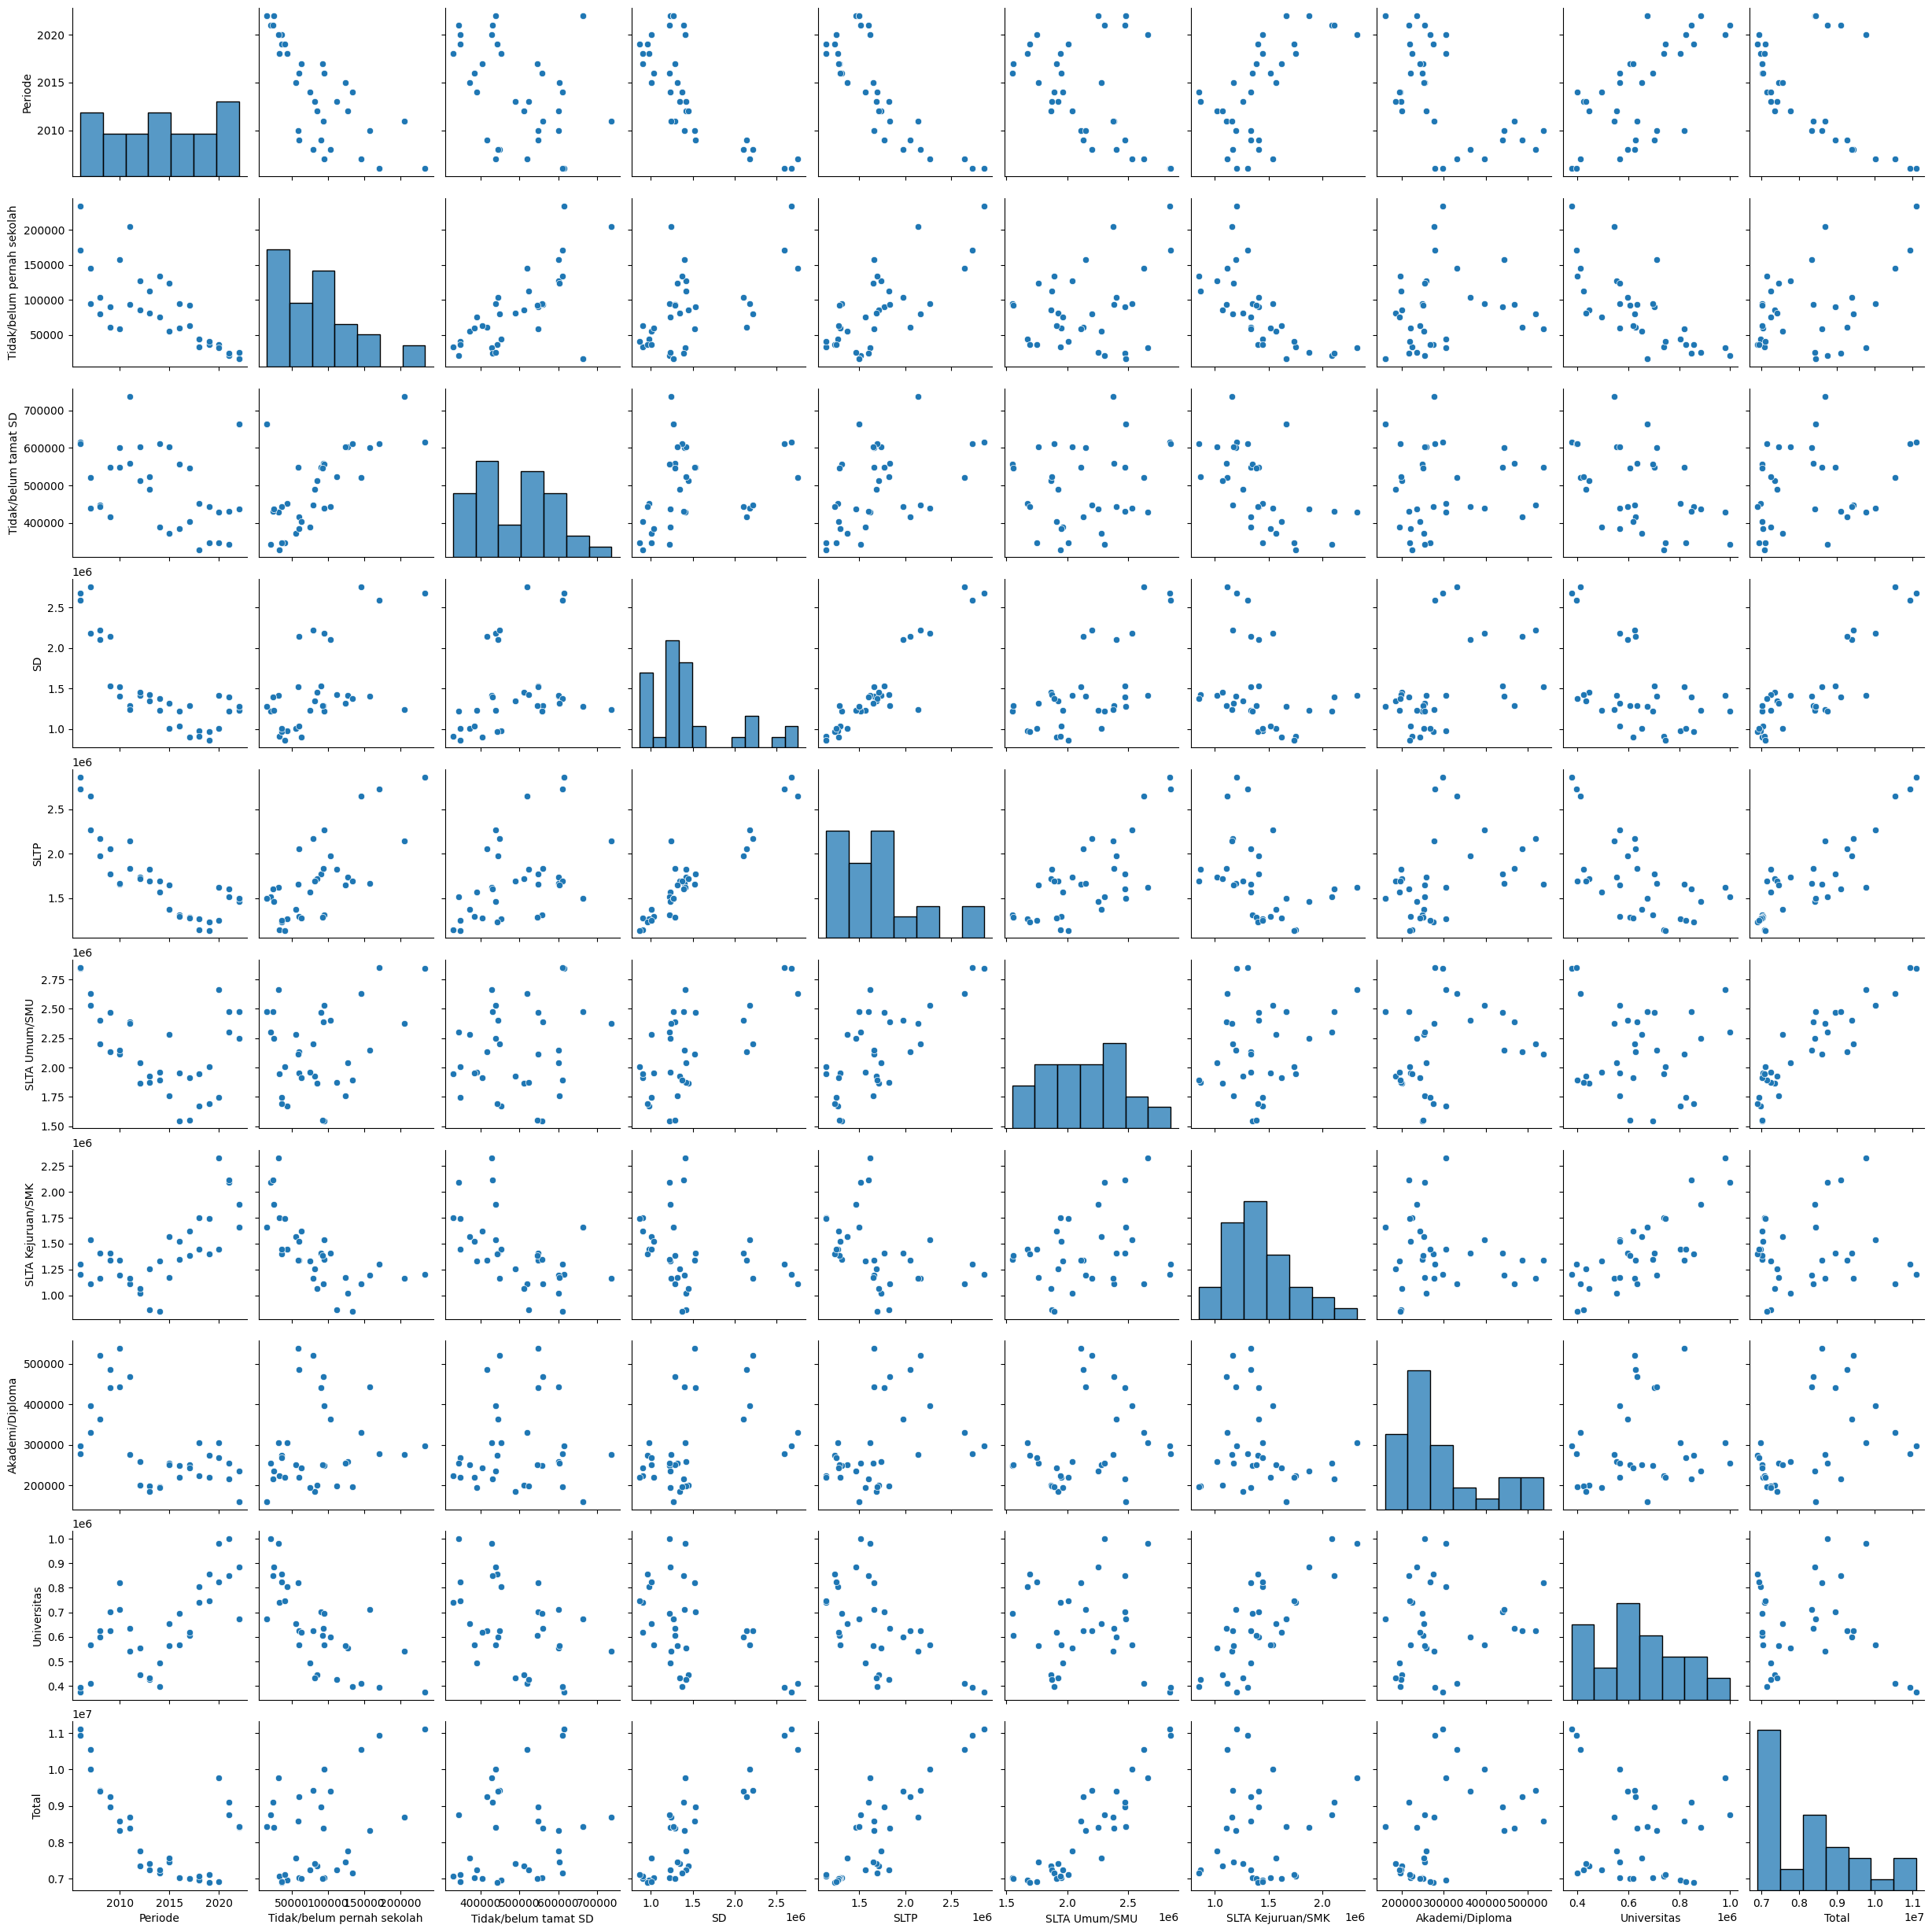

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
#Residual Plot
# Define education level columns (needed if running this cell independently)
edu_columns = [
        'Tidak/belum pernah sekolah',
        'Tidak/belum tamat SD',
        'SD',
        'SLTP',
        'SLTA Umum/SMU',
        'SLTA Kejuruan/SMK',
        'Akademi/Diploma',
        'Universitas'
]

# Access results for the first education level as an example
first_edu_level = edu_columns[0]
y_test = results[first_edu_level]['y_test']
y_pred = results[first_edu_level]['y_pred']

residuals = y_test - y_pred

plt.figure(figsize=(7,6))
sns.scatterplot(x=y_pred, y=residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual (Error)')
plt.title(f'Plot Residual (Error vs Prediksi) for {first_edu_level}')
plt.show()

NameError: name 'edu_columns' is not defined

In [ ]:
#Distribusi Error
plt.figure(figsize=(7,6))
sns.histplot(residuals, bins=20, kde=True, color='purple')
plt.xlabel('Residual')
plt.title('Distribusi Residual (Error Model)')
plt.show()

NameError: name 'residuals' is not defined

<Figure size 700x600 with 0 Axes>

In [ ]:
# Contoh konversi kolom 'bulan' ke angka
data['Bulan'] = data['Bulan'].replace({
    'Januari': 1, 'Februari': 2, 'Maret': 3, 'April': 4, 'Mei': 5,
    'Juni': 6, 'Juli': 7, 'Agustus': 8, 'September': 9,
    'Oktober': 10, 'November': 11, 'Desember': 12
})

sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [ ]:
data = data.drop_duplicates()

# Convert 'Bulan' back to string for date creation
data['Date'] = data.apply(lambda row: pd.to_datetime(f"{row['Periode']}-{int(row['Bulan'])}-01"), axis=1)


data = data.sort_values('Date')

edu_columns = [
    'Tidak/belum pernah sekolah',
    'Tidak/belum tamat SD',
    'SD',
    'SLTP',
    'SLTA Umum/SMU',
    'SLTA Kejuruan/SMK',
    'Akademi/Diploma',
    'Universitas'
]

for col in edu_columns:
    data[f'{col}_Percentage'] = data[col] / data['Total'] * 100

data = data.reset_index(drop=True)

data

percentage_columns = [col for col in data.columns if col.endswith('_Percentage')]

plt.figure(figsize=(15, 8))
for col in percentage_columns:
    plt.plot(data['Date'], data[col], label=col.replace('_Percentage', ''), marker='o')

plt.title('Unemployment Distribution by Education Level Over Time')
plt.xlabel('Time')
plt.ylabel('Unemployment Percentage')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'data' is not defined

In [ ]:
# Define education level columns
edu_columns = [
        'Tidak/belum pernah sekolah',
        'Tidak/belum tamat SD',
        'SD',
        'SLTP',
        'SLTA Umum/SMU',
        'SLTA Kejuruan/SMK',
        'Akademi/Diploma',
        'Universitas'
]

results = {}

for col in edu_columns:
    X = np.arange(len(data)).reshape(-1, 1)
    y = data[f'{col}_Percentage'].values

    #Split Data (Training & Testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Model Regresi Linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    #Prediksi Data Uji
    y_pred = model.predict(X_test)

    #Evaluasi Model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[col] = {
        'model': model,
        'mse': mse,
        'r2': r2,
        'coef': model.coef_[0],
        'intercept': model.intercept_,
        'y_test': y_test,
        'y_pred': y_pred,
        'X_test': X_test.flatten(),
        'dates': data.loc[X_test.flatten(), 'Date']
    }

    #Visualisasi Prediksi vs Aktual
    plt.figure(figsize=(12, 6))
    plt.scatter(results[col]['dates'], y_test, color='blue', label='Actual')
    plt.plot(results[col]['dates'], y_pred, color='red', label='Predicted')
    plt.title(f'{col}: Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel(f'{col} Percentage')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print(f"Regression Coefficient: {model.coef_[0]}")
    print(f"Intercept: {model.intercept_}")
    print("\n")

results

In [ ]:
#Garis Regresi
if X.shape[1] == 1:
    plt.figure(figsize=(7,6))
    sns.regplot(x=X_test[:,0], y=y_test, line_kws={"color":"red"})
    plt.xlabel('Index') # Updated label to reflect that X is now an index
    plt.ylabel('Periode')
    plt.title('Garis Regresi Linear')
    plt.show()

In [ ]:
#Nilai Aktual vs Prediksi (Bar Chart)
df_compare = pd.DataFrame({'Aktual': y_test, 'Prediksi': y_pred})
df_compare = df_compare.reset_index(drop=True).head(20)  # ambil 20 data pertama

plt.figure(figsize=(12,6))
df_compare.plot(kind='bar', figsize=(12,6))
plt.title('Perbandingan Nilai Aktual vs Prediksi (20 Sampel)')
plt.xlabel('Sampel')
plt.ylabel('Nilai Periode')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Prediksi Tingkat Pengangguran berdasarkan Tingkat Pendidikan 5 Tahun Kedepan
models = {}
future_predictions = {}
years_to_predict = 5

for col in edu_columns:
    X = np.arange(len(data)).reshape(-1, 1)
    y = data[col].values

    model = LinearRegression()
    model.fit(X, y)

    last_index = len(data)
    future_indices = np.arange(last_index, last_index + years_to_predict * 12).reshape(-1, 1)

    future_values = model.predict(future_indices)
    future_values = np.maximum(future_values, 0)
    models[col] = model
    future_predictions[col] = future_values

future_dates = pd.date_range(start=data['Date'].iloc[-1] + pd.DateOffset(months=1), periods=years_to_predict * 12, freq='ME')

plt.figure(figsize=(15, 8))

for col in future_predictions.keys():
    plt.plot(data['Date'], data[col], label=col, marker='o')
    plt.plot(future_dates, future_predictions[col], label=f'Future {col}', linestyle='--')

plt.title('Unemployment Predictions by Education Level')
plt.xlabel('Time')
plt.ylabel('Unemployment Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Lihat Koefisien Regresi dan Intercept
print("\n===== KOEFISIEN REGRESI DAN INTERCEPT =====")
for col, result in results.items():
    print(f"Education Level: {col}")
    print(f"Regression Coefficient: {result['coef']:.4f}")
    print(f"Intercept: {result['intercept']:.4f}")
    print("-" * 30)

In [ ]:
#Konstanta
print(f"\nIntercept (Konstanta): {model.intercept_:.4f}")